In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action = 'ignore', category= FutureWarning)

In [2]:
df=pd.read_csv("C:/Users/hp/Downloads/Autism.csv")
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [4]:
df.isnull().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

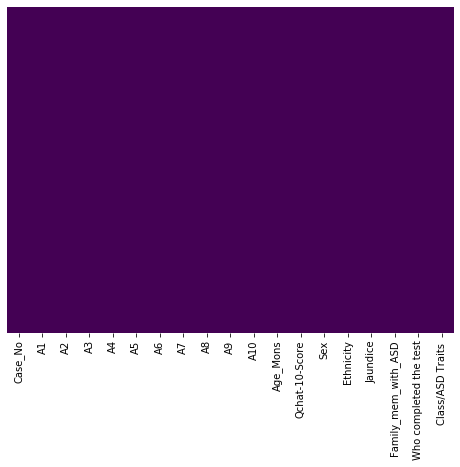

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df=df.drop(['Case_No', 'Who completed the test'], axis=1)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,No
1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,Yes


In [7]:
data = df[df['Class/ASD Traits '] == "Yes"]
print(len(data)/len(df) * 100)

69.07020872865274


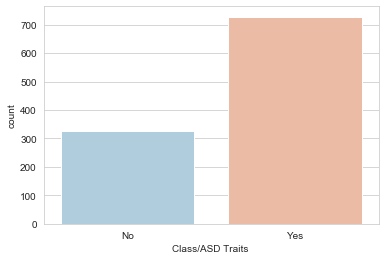

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Class/ASD Traits ',data=df,palette='RdBu_r')

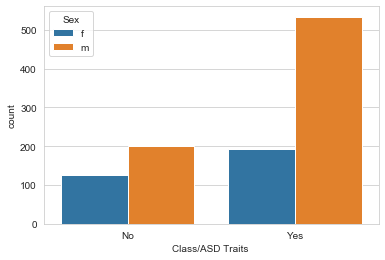

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Class/ASD Traits ',hue='Sex',data=df)

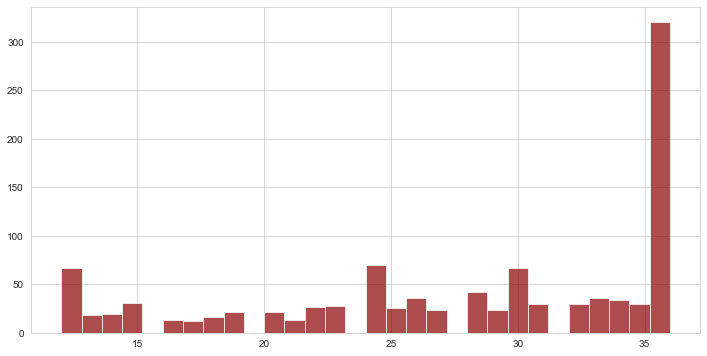

In [10]:
plt.figure(figsize=(12,6))
df['Age_Mons'].hist(bins=30,color='darkred',alpha=0.7)

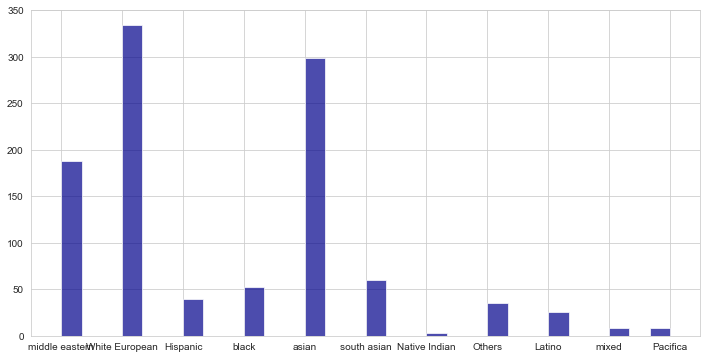

In [11]:
plt.figure(figsize=(12,6))
df['Ethnicity'].hist(bins=30,color='darkblue',alpha=0.7)

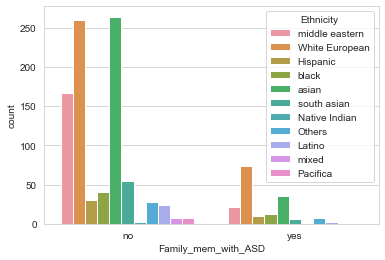

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Family_mem_with_ASD',hue='Ethnicity',data=df)

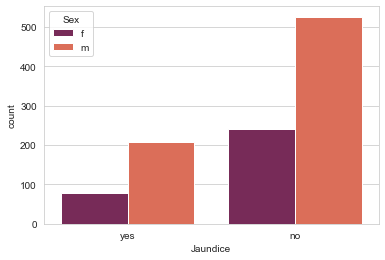

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Jaundice',hue='Sex',data=df,palette='rocket')

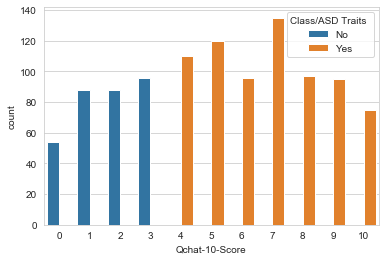

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Qchat-10-Score',hue='Class/ASD Traits ',data=df)

In [15]:
df['Ethnicity'].value_counts()

White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
Pacifica            8
mixed               8
Native Indian       3
Name: Ethnicity, dtype: int64

In [16]:
eth = {'Ethnicity': {"White European" : 1, "asian": 2, "middle eastern": 3, "south asian": 4, "black": 5, "Hispanic": 6, 
                    "Others": 7, "Latino": 8, "Pacifica": 9, "mixed": 10, "Native Indian": 11}}
df.replace(eth, inplace= True)

In [17]:
gender = pd.get_dummies(df['Sex'],drop_first=True, prefix='Sex')
Class_ASD = pd.get_dummies(df['Class/ASD Traits '],drop_first=True, prefix='ASD')
family = pd.get_dummies(df['Family_mem_with_ASD'],drop_first=True, prefix='Family')

In [18]:
df.drop(['Sex','Class/ASD Traits ', 'Family_mem_with_ASD'],axis=1,inplace=True)

In [19]:
df = pd.concat([df, gender, Class_ASD, family],axis=1)

In [20]:
df=df.drop(['Jaundice'], axis=1)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Ethnicity,Sex_m,ASD_Yes,Family_yes
0,0,0,0,0,0,0,1,1,0,1,28,3,3,0,0,0
1,1,1,0,0,0,1,1,0,0,0,36,4,1,1,1,0
2,1,0,0,0,0,0,1,1,0,1,36,4,3,1,1,0
3,1,1,1,1,1,1,1,1,1,1,24,10,6,1,1,0
4,1,1,0,1,1,1,1,1,1,1,20,9,1,0,1,1


In [21]:
from sklearn.model_selection import train_test_split
X=df.drop('ASD_Yes', axis=1)
y=df['ASD_Yes']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [23]:
clfs = []

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.score(X_test, y_test)
clfs.append(dtree)

In [25]:
print('dt: {}'.format(dtree.score(X_test, y_test)))

dt: 1.0


In [26]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
model = regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
regressor.score(X_test, y_test)
clfs.append(regressor)

In [27]:
print('rf: {}'.format(regressor.score(X_test, y_test)))

rf: 1.0


[[129   0]
 [  0 293]]


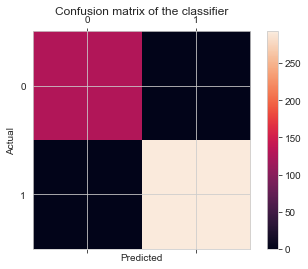



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       293

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422



In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_pred, labels)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('\n')
print(classification_report(y_test, y_pred))

In [29]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [30]:
lr_probs = model.predict(X_test)

No handles with labels found to put in legend.


Logistic: ROC AUC=1.000


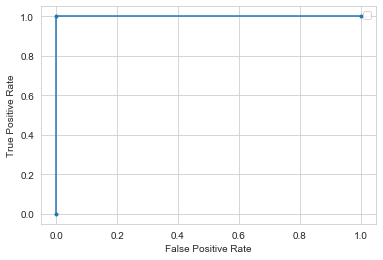

In [31]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()